In [0]:
# Gráfico de barra e de pizza: para variáveis nominais e ordinais
# Histogramas: para variáveis intervalares ou de razão
  
  
# Simetria negativa ou positiva

In [0]:
# Estimativa da densidade de Kernel: faz interpolação e consegue a distribuição.
#                                    É bom para poucas variáveis

#Outliers: interquartil = 3º quartil - 1º quartil(upper quartile - lower quartile)
#             --> 3 quartil + 3*1,5: a partir desse valor pra cima é outlier(upper bound)
#             --> 1 quartil - 3*1,5: a partir desse valor pra baixo é outlier(lower bound)

In [0]:
# Grouped bar plots are ideal to compare the frequency distributions of nominal 
# or ordinal variables. For variables measured on an interval or ratio scale, 
# we can use step-type histograms, kernel density plots, or, for better readability, strip plots or box plots.

# 1.0 Visualizing Frequency Distributions

## 1.1 Visualizing Distributions

To find patterns in a frequency table we have to look up the frequency of each unique value or class interval and at the same time compare the frequencies. This process can get time consuming for tables with many unique values or class intervals, or when the frequency values are large and hard to compare against each other.

We can solve this problem by **visualizing** the data in the tables with the help of graphs. Graphs make it much easier to scan and compare frequencies, providing us with a single picture of the entire distribution of a variable.

Because they are easy to grasp and also eye-catching, graphs are a better choice over frequency tables if we need to present our findings to a non-technical audience.

In this lesson, we'll learn about three kinds of graphs:

- Bar plots.
- Pie charts.
- Histograms.

By the end of the mission, we'll know how to generate ourselves the graphs below, and we'll know when it makes sense to use each:

<center><img width="1000" src="https://drive.google.com/uc?export=view&id=1Rxdp-_t01VXmbJayEqTs4WOn4_-SAL6t"></center>

We've already learned about bar plots and histograms in the EDA lessons. In this mission we build upon that knowledge and discuss the graphs in the context of statistics by learning for what kind of variables each graph is most suitable for.


## 1.2 Bar Plots

For variables measured on a **nominal** or an **ordinal** scale it's common to use a **bar plot** to visualize their distribution. To generate a **bar plot** for the distribution of a variable we need two sets of values:

- One set containing the unique values.
- Another set containing the frequency for each unique value.

We can get this data easily from a frequency table. We can use **Series.value_counts()** to generate the table, and then use the [Series.plot.bar()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.bar.html) method on the resulting table to generate a **bar plot**. Using the same WNBA dataset we've been working with for the past missions, this is how we'd do that for the Pos (player position) variable:

```python
>> wnba['Pos'].value_counts().plot.bar()
```

<center><img width="400" src="https://drive.google.com/uc?export=view&id=1xPuz8XKNPPmGVdpMbqLcVNniySRGGuDc"></center>

The **Series.plot.bar()** method generates a vertical bar plot with the frequencies on the y-axis, and the unique values on the x-axis. To generate a horizontal bar plot, we can use the [Series.plot.barh() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.barh.html):

```python
>> wnba['Pos'].value_counts().plot.barh()
```
<center><img width="400" src="https://drive.google.com/uc?export=view&id=1jQCBSxV20rDElban00Shk08R6ykT0oXk"></center>


As we'll see in the next screen, horizontal bar plots are ideal to use when the labels of the unique values are long.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- We've taken information from the **Experience** column, and created a new column named **Exp_ordinal**, which is measured on an ordinal scale. The new column has five unique labels, and each one corresponds to a number of years a player has played in WNBA:

<img width="300" src="https://drive.google.com/uc?export=view&id=1tqqE0d76Xk1baGCTWNEkYbJ9Muevfuw3">

- Create a **bar plot** to display the distribution of the **Exp_ordinal** variable:
  - Generate a frequency table for the **Exp_ordinal** variable.
  - Sort the table by unique labels in an ascending order using the techiques we learned in the previous mission.
  - Generate a bar plot using the **Series.plot.bar()** method.
  
  
  
  

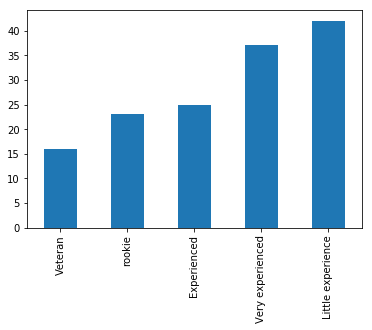

In [0]:
# put your code here
import pandas as pd
wnba = pd.read_csv("wnba.csv")
# cleaning the experience column
wnba.loc[wnba.Experience == 'R',"Experience"] = 0
wnba["Experience"] = wnba["Experience"].astype(int)

# create exp_ordinal column
wnba["Exp_ordinal"] = pd.cut(wnba.Experience,
       bins=[-1,0,3,5,10,100],
       labels=["rookie","Little experience","Experienced",
              "Very experienced","Veteran"])

# verify the results
wnba.Exp_ordinal.value_counts()

wnba["Exp_ordinal"].value_counts().sort_values(ascending = True).plot.bar()

## 1.3 Horizontal Bar Plots

One of the problems with the bar plot we built in the last exercise is that the tick labels of the x-axis are hard to read:

<img width="400" src="https://drive.google.com/uc?export=view&id=1gKTo1l94020_BBnk7ilS8WzllVFzYfFE">


To fix this we can rotate the labels, or we can switch to a horizontal bar plot. We can rotate the labels using the rot parameter of **Series.plot.bar()** method we used. The labels are already rotated at 90°, and we can tilt them a bit at 45°:

```python
>> wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar(rot = 45)
```

<img width="400" src="https://drive.google.com/uc?export=view&id=1wD2TvUAm0fyBrVwWeE5KnTxuz2IS6RKf">

Slightly better, but we can do a better job with a horizontal bar plot. If we wanted to publish this bar plot, we'd also have to make it more informative by adding a title. This is what we'll do in the next exercise, but for now this is how we could do that for the **Pos** variable (note that we use the [Series.plot.barh()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.barh.html) method, not **Series.plot.bar()**):

```python
>> wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')
```

<img width="400" src="https://drive.google.com/uc?export=view&id=1cNU5qtgeawYB-9ec-pC16XtN_6Rtb1Sd">



**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Create a horizontal bar plot to visualize the distribution of the **Exp_ordinal** variable.
  - Generate a frequency table for the **Exp_ordinal** variable.
  - Sort the table by unique labels in an ascending order.
  - Use the **Series.plot.barh()** method to generate the horizontal bar plot.
  - Add the following title to the plot: **Number of players in WNBA by level of experience.**

Text(0.5, 1.0, 'Number of players in WNBA by level of experience')

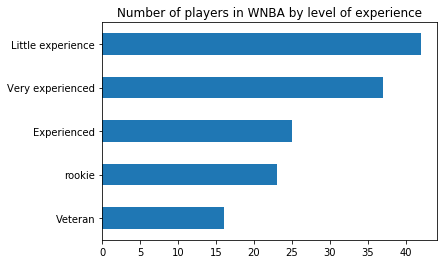

In [0]:
# put your code here
wnba["Exp_ordinal"].value_counts().sort_values(ascending = True).plot.barh().set_title("Number of players in WNBA by level of experience")

## 1.4 Pie Charts

Another kind of graph we can use to visualize the distribution of **nominal** and **ordinal** variables is a **pie chart**.

Just as the name suggests, a pie chart is structured pretty much like a regular pie: it takes the form of a circle and is divided in wedges. Each wedge in a pie chart represents a category (one of the unique labels), and the size of each wedge is given by the proportion (or percentage) of that category in the distribution.

<img width="600" src="https://drive.google.com/uc?export=view&id=1KKprkhfZaGe0CkLO0p3FzoJ6i71QrSv-">


We can generate pie charts using the [Series.plot.pie() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.pie.html). This is how we'd do that for the **Pos** variable:

```python
>> wnba['Pos'].value_counts().plot.pie()
```

<img width="400" src="https://drive.google.com/uc?export=view&id=1MvVv73TYBDN5VNZ2gELxp5I4O3bn6UJC">


The main advantage of pie charts over bar plots is that they provide a much better sense for the relative frequencies (proportions and percentages) in the distribution. Looking at a bar plot, we can see that categories are more or less numerous than others, but it's really hard to tell what proportion in the distribution each category takes.

With pie charts, we can immediately get a visual sense for the proportion each category takes in a distribution. Just by eyeballing the pie chart above we can make a series of observations in terms of proportions:

- Guards ("G") take about two fifths (2/5) of the distribution.
- Forwards ("F") make up roughly a quarter (1/4) of the distribution.
- Close to one fifth (1/5) of the distribution is made of centers ("C").
- Combined positions ("G/F" and "F/C") together make up roughly one fifth (1/5) of the distribution.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Generate a pie chart to visualize the distribution of the **Exp_ordinal** variable.
  - Generate a frequency table for the **Exp_ordinal** variable. Don't sort the table this time.
  - Use the **Series.plot.pie()** method to generate the pie plot.

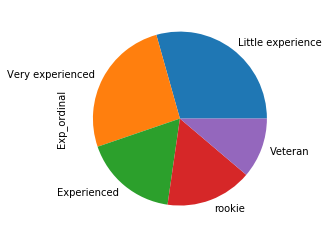

In [0]:
# put your code here
wnba["Exp_ordinal"].value_counts().plot.pie()

## 1.5  Customizing a Pie Chart

The pie chart we generated in the previous exercise is more an ellipsis than a circle, and the **Exp_ordinal** label is unaesthetic and hard to read:

<img width="400" src="https://drive.google.com/uc?export=view&id=1tVBOULsftVpM-DH75lZvNGY09Jdavsik">


To give a pie chart the right shape, we need to specify equal values for height and width in the **figsize** parameter of **Series.plot.pie()**. The **Exp_ordinal** is the label of a hidden y-axis, which means we can use the **plt.ylabel()** function to remove it. This is how we can do this for the **Pos** variable:

```python
>> import matplotlib.pyplot as plt
>> wnba['Pos'].value_counts().plot.pie(figsize = (6,6))
>> plt.ylabel('')
```

<img width="250" src="https://drive.google.com/uc?export=view&id=1-ER6QNonL-CTu6tBMnvdL4PPER17igTt">


Ideally, we'd have proportions or percentages displayed on each wedge of the pie chart. Fortunately, this is easy to get using the **autopct** parameter. This parameter accepts Python string formatting, and we'll use the string **'%.1f%%'** to have percentages displayed with a precision of one decimal place. Let's break down this string formatting:

<center><img width="400" src="https://drive.google.com/uc?export=view&id=1Q6E-FXJCl4qVDplM3tM2n71i21eDk7vi"></center>
  
  
This is how the process looks for the Pos variable:

```ptyhon
>> wnba['Pos'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')
```

<img width="300" src="https://drive.google.com/uc?export=view&id=1KnC3jlcoXgEXKcWMzQvS2hS6kxewrfLY">


Notice that the percentages were automatically determined under the hood, which means we don't have to transform to percentages ourselves using **Series.value_counts(normalize = True) * 100.**

Other display formats are possible, and more documentation on the the syntax of string formatting in Python can be found [here](https://docs.python.org/3/library/string.html#format-specification-mini-language). Documentation on **autopct** and other nice customization parameters can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html).

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Generate and customize a pie chart to visualize the distribution of the **Exp_ordinal** variable.
  - Generate a frequency table for the **Exp_ordinal** variable. Don't sort the table this time.
  - Use the **Series.plot.pie()** method to generate the **pie plot.**
      - Use the **figsize** parameter to specify a **width** and a **height** of 6 inches each.
      - Use the **autopct** parameter to have percentages displayed with a precision of 2 decimal places.
      - Add the following title to the plot: **Percentage of players in WNBA by level of experience.**
      - Remove the **Exp_ordinal** label.



Text(0, 0.5, '')

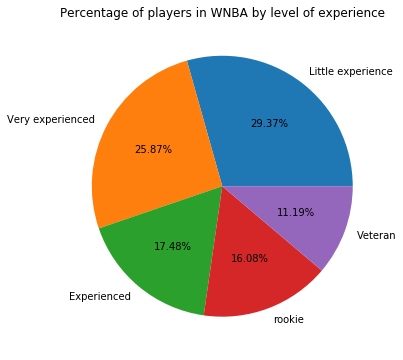

In [0]:
# put your code here
import matplotlib.pyplot as plt
wnba["Exp_ordinal"].value_counts().plot.pie(figsize=(6,6), autopct = "%.2f%%").\
                    set_title("Percentage of players in WNBA by level of experience")
plt.ylabel("")

## 1.6 Histograms

Because of the special properties of variables measured on interval and ratio scales, we can describe distributions in more elaborate ways. Let's examine the **PTS** (total points) variable, which is discrete and measured on a ratio scale:

```python
>> wnba['PTS'].describe()
count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64
```

We can see that 75% of the values are distributed within a relatively narrow interval (between 2 and 277), while the remaining 25% are distributed in an interval that's slightly larger.

<img width="500" src="https://drive.google.com/uc?export=view&id=1eKJa7moOQBWYg5iswrL5KZv6ZHJXZeNJ">


To visualize the distribution of the **PTS** variable, we need to use a graph that allows us to see immediately the patterns outlined above. The most commonly used graph for this scenario is the **histogram**.

To generate a histogram for the **PTS** variable, we can use the **Series.plot.hist()** method directly on the **wnba['PTS']** column (we don't have to generate a frequency table in this case):

```python
>> wnba['PTS'].plot.hist()
```

<img width="500" src="https://drive.google.com/uc?export=view&id=1Qa6ZdGR-918onl80zHS6ckoF5rMRuYOx">

In the next screen, we'll explain the statistics happening under the hood when we run **wnba['PTS'].plot.hist()** and discuss the histogram above in more detail. Until then, let's practice generating the histogram above ourselves.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Using **Series.plot.hist()**, generate a histogram to visualize the distribution of the **PTS** variable.

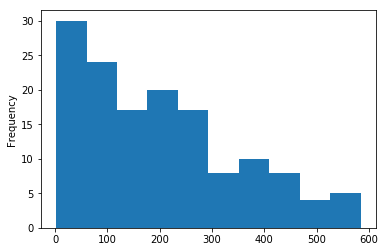

In [0]:
# put your code here
wnba["PTS"].plot.hist()

## 1.7 The Statistics Behind Histograms

Under the hood, the **wnba['PTS'].plot.hist()** method:

- Generated a grouped frequency distribution table for the **PTS** variable with ten class intervals.
- For each class interval it plotted a bar with a height corresponding to the frequency of the interval.

Let's examine the grouped frequency distribution table of the **PTS** variable:

```python
>> wnba['PTS'].describe()
count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64
```

Each bar in the histogram corresponds to one class interval. To show this is true, we'll generate below the same histogram as in the previous screen, but this time:

- We'll add the values of the x-ticks manually using the xticks parameter.
  - The values will be the limits of each class interval.
  - We use the [arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html?highlight=arange#numpy.arange) function from numpy to generate the values and avoid spending time with typing all the values ourselves.
  - We start at 2, not at 1.417, because this is the actual minimum value of the first class interval (we discussed about this in more detail in the previous mission).
- We'll add a **grid** line using the grid parameter to demarcate clearly each bar.
- We'll rotate the tick labels of the x-axis using the rot parameter for better readability.

```python
>> from numpy import arange
>> wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)
```

Looking on the histogram above, we can extract the same information as from the grouped frequency table. We can see that there are 20 players in the interval (176.6, 234.8], 10 players in the interval (351.2, 409.4], etc.

More importantly, we can see the patterns we wanted to see in the last screen when we examined the output of **wnba['PTS'].describe()**.


<img width="700" src="https://drive.google.com/uc?export=view&id=1qQtYC5R9oylmOkpx_YjzpCZLv7cUo_5b">



From the output of **wnba['PTS'].describe()** we can see that most of the values (75%) are distributed within a relatively narrow interval (between 2 and 277). This tells us that:

- The values are distributed unevenly across the 2 - 584 range (2 is the minimum value in the **PTS** variable, and 584 is the maximum).
- Most values are clustered in the first (left) part of the the distribution's range.


<img width="500" src="https://drive.google.com/uc?export=view&id=178mhCdacbAzjXqwfDSbVZJtGQ0ucuqzW">


We can immediately see the same two patterns on the histogram above:

- The distribution of values is uneven, with each class interval having a different frequency. If the distribution was even, all the class intervals would have the same frequency.
- Most values (roughly three quarters) are clustered in the left half of the histogram.

While it's easy and fast to make good estimates simply by looking at a histogram, it's always a good idea to add precision to our estimates using the percentile values we get from **Series.describe().**


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Examine the distribution of the **Games Played** variable using the **Series.describe()** method. Just from the output of this method, predict how the histogram of the **Games Played** variable should look like.
- Once you have a good idea of what histogram shape to expect, plot a histogram for the **Games Played** variable using **Series.plot.hist()**.

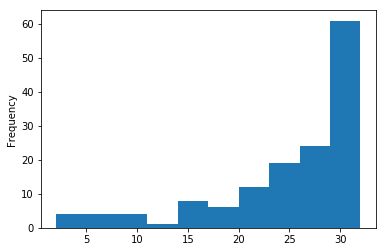

In [0]:
# put your code here
wnba["Games Played"].describe()
wnba["Games Played"].plot.hist()

## 1.8 Histograms as Modified Bar Plots


It should now be clear that a histogram is basically the visual form of a grouped frequency table. Structurally, a histogram can also be understood as a modified version of a bar plot. The main difference is that in the case of a histogram there are no gaps between bars, and each bar represents an interval, not a single value.

The main reason we remove the gaps between bars in case of a histogram is that we want to show that the class intervals we plot are adjacent to one another. With the exception of the last interval, the ending point of an interval is the starting point of the next interval, and we want that to be seen on the graph.

<img width="300" src="https://drive.google.com/uc?export=view&id=15v9hcTmgnSArcOD5jwZSlKJQTfwoVtHt">

For bar plots we add gaps because in most cases we don't know whether the unique values of ordinal variables are adjacent to one another in the same way as two class intervals are. It's safer to assume that the values are not adjacent, and add gaps.


<img width="600" src="https://drive.google.com/uc?export=view&id=1Bdl2qABVrU1nGjT1jIha-qwK7B62Caga">


For nominal variables, values can't be numerically ajdacent in principle, and we add gaps to emphasize that the values are fundamentally distinct.

Below we summarize what we've learned so far:


<img width="400" src="https://drive.google.com/uc?export=view&id=19NxFZUcKvnQFnXvvAQl5xjOpnF_reJD-">

## 1.9 Binning for Histograms

You might have noticed that **Series.plot.hist()** splits a distribution by default into 10 class intervals. In the previous mission, we learned that 10 is a good number of class intervals to choose because it offers a good balance between information and comprehensibility.

<img width="400" src="https://drive.google.com/uc?export=view&id=1C8q5Zxpdkd_rILrIr4hqO7jCmoUgT10c">

With histograms, the breakdown point is generally larger than 10 because visualizing a picture is much easier than reading a grouped frequency table. However, once the number of class intervals goes over 30 or so, the granularity increases so much that for some intervals the frequency will be zero. This will result in a discontinued histogram from which is hard to discern patterns.

Below, we can see how the histogram of the **PTS** variable changes as we vary the number of class intervals.


<img width="600" src="https://drive.google.com/uc?export=view&id=1yLJH1J-aXojOhzPg0FICmv6IQ9aXcpn8">


To modify the number of class intervals used for a histogram, we can use the **bins** parameter of **Series.plot.hist()**. A bin is the same thing as a class interval, and, when it comes to histograms, the term "bin" is used much more often.

Also, we'll often want to avoid letting pandas work out the intervals, and use instead intervals that we think make more sense. We can do this in two steps:

- We start with specifying the range of the entire distribution using the **range** parameter of **Series.plot.hist().**
- Then we combine that with the number of bins to get the intervals we want.


Let's say we want to get these three intervals for the distribution of the PTS variable:

- [1, 200)
- [200, 400)
- [400, 600]

If the histogram ranges from 1 to 600, and we specify that we want three bins, then the bins will automatically take the intervals above. This is because the bins must have equal interval lengths, and, at the same time, cover together the entire range between 1 and 600. To cover a range of 600 with three bins, we need each bin to cover 200 points, with the first bin starting at 1, and the last bin ending at 600.


<img width="600" src="https://drive.google.com/uc?export=view&id=1W8a-hbTW_ex0BI53go4xWvjKfMMP-WoO">


This is how we can generate a histogram with three bins and a 1 - 600 range for the **PTS** variable:

```python
>> wnba['PTS'].plot.hist(range = (1,600), bins = 3)
```


<img width="400" src="https://drive.google.com/uc?export=view&id=1O-MfgUUOn1oEfTn1elEkpru5E49XP04c">


If we keep the same range, but change to six bins, then we'll get these six intervals: [1, 100), [100, 200), [200, 300), [300, 400), [400, 500), [500, 600].


```python
>> wnba['PTS'].plot.hist(range = (1,600), bins = 6)
```


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Generate a histogram for the **Games Played** variable, and customize it in the following way:
  - Each bin must cover an interval of 4 games. The first bin must start at 1, the last bin must end at 32.
  - Add the title "The distribution of players by games played".
  - Add a label to the x-axis named "Games played".

Text(0.5, 0, 'Games played')

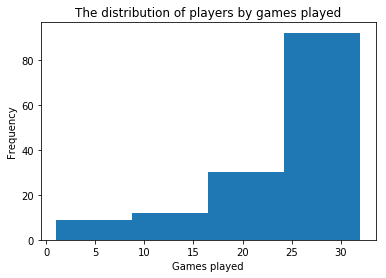

In [0]:
# put your code here
import matplotlib.pyplot as plt
wnba["Games Played"].plot.hist(range = (1,32), bins = 4).set_title("The distribution of players by games played")
plt.xlabel("Games played")

## 1.10 Skewed Distributions

There are a couple of histogram shapes that appear often in practice. So far, we've met two of these shapes:

<img width="600" src="https://drive.google.com/uc?export=view&id=1kosNk32RFOru1alq7taeD9u4DWMWanoi">


In the histogram on the left, we can see that:

- Most values pile up toward the endpoint of the range (32 games played).
- There are less and less values toward the opposite end (0 games played).

On the right histogram, we can see that:

- Most values pile up toward the starting point of the range (0 points).
- There are less and less values toward the opposite end.

Both these histograms show **skewed distributions**. In a skewed distribution:

- The values pile up toward the end or the starting point of the range, making up the body of the distribution.
- Then the values decrease in frequency toward the opposite end, forming the tail of the distribution.


<img width="400" src="https://drive.google.com/uc?export=view&id=1KR4lZFs4Z3D9GrEqpma9wRxRJbBvUzuC">



If the tail points to the left, then the distribution is said to be **left skewed**. When it points to the left, the tail points at the same time in the direction of negative numbers, and for this reason the distribution is sometimes also called **negatively skewed.**

If the tail points to the right, then the distribution is **right skewed**. The distribution is sometimes also said to be **positively skewed** because the tail points in the direction of positive numbers.


<img width="600" src="https://drive.google.com/uc?export=view&id=1FIUz6XuJTcU74IHfJvJP6Il_JkUUXD3g">


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Examine the distribution of the following two variables:
  - **AST** (number of assists).
  - **FT%** (percentage of free throws made out of all attempts).
- Depending on the shape of the distribution, assign the string **'left skewed'** or **'right skewed'** to the following variables:
  - **assists_distro** for the **AST** column.
  - **ft_percent_distro** for the **FT%** column.

For instance, if you think the **AST** variable has a right skewed distribution, your answer should be **assists_distro = 'right skewed'.**

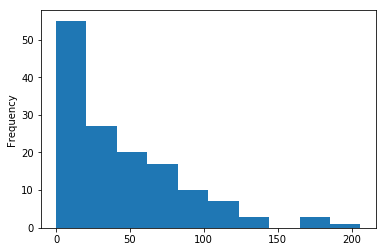

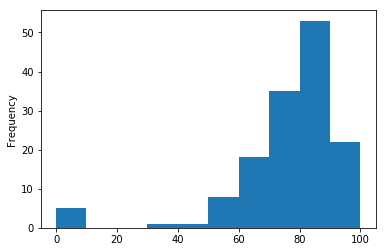

In [0]:
# put your code here
wnba["AST"].plot.hist() # Enviesada pela direita
plt.show()
wnba["FT%"].plot.hist() # Enviesada pela esquerda
plt.show()
assists_distro = "right skewed"
ft_percent_distro = "left skewed"

## 1.11 Symmetrical Distributions

Besides skewed distributions, we often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we'll divide the histogram in two halves that are mirror images of one another.



<img width="500" src="https://drive.google.com/uc?export=view&id=1FAOJOZTgCGv6FAQMfFH7ap2HjQok2ZEs">


If the shape of the histogram is **symmetrical**, then we say that we have a **symmetrical distribution.**

A very common symmetrical distribution is one where the values pile up in the middle and gradually decrease in frequency toward both ends of the histogram. This pattern is specific to what we call a **normal distribution** (also called **Gaussian distribution**).



<img width="500" src="https://drive.google.com/uc?export=view&id=16AQYkLid4MnTqFLK8CID3wDWybbKvHgJ">


Another common symmetrical distribution is one where the values are distributed uniformly across the entire range. This pattern is specific to a **uniform distribution.**

<img width="500" src="https://drive.google.com/uc?export=view&id=1WvoDjqD-S-W9qOkqaPt9o3JZs438T9TJ">


In practice, we rarely see perfectly **symmetrical distributions**. However, it's common to use perfectly symmetrical distributions as baselines for describing the distributions we see in practice. For instance, we'd describe the distribution of the **Weight** variable as resembling closely a normal distribution:

```python
>> wnba['Weight'].plot.hist()
```

<img width="400" src="https://drive.google.com/uc?export=view&id=1eoNnxKtW_V5PrdZ5V1P83_YKWKNh61bZ">


When we say that the distribution above resembles closely a normal distribution, we mean that most values pile up somewhere close to the middle and decrease in frequency more or less gradually toward both ends of the histogram.

A similar reasoning applies to skewed distributions. We don't see very often clear-cut skewed distributions, and we use the left and right skewed distributions as baselines for comparison. For instance, we'd say that the distribution of the **BMI** variable is slightly **right skewed**:

```python
>> wnba['BMI'].plot.hist()
```

There's more to say about distribution shapes, and we'll continue this discussion in the next course when we'll learn new concepts. Until then, let's practice what we've learned.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Examine the distribution of the following variables, trying to determine which one resembles the most a normal distribution:
  - Age
  - Height
  - MIN
- Assign to the variable **normal_distribution** the name of the variable (as a string) whose distribution resembles the most a normal one.

For instance, if you think the **MIN** variable is the correct answer, then your answer should be **normal_distribution = 'MIN'.**

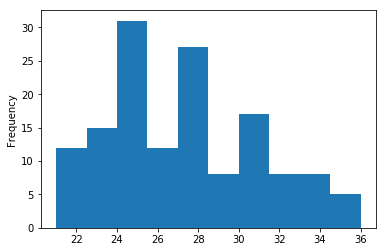

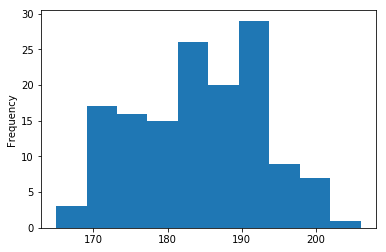

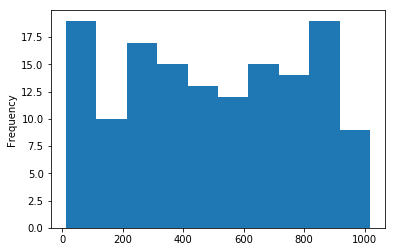

In [0]:
# put your code here
wnba["Age"].plot.hist()
plt.show()
wnba["Height"].plot.hist()
plt.show()
wnba["MIN"].plot.hist()
plt.show()
normal_distribution = "Height"

## 1.12 Next Steps

In this mission, we learned about the graphs we can use to visualize the distributions of various kinds of variables. If a variable is measured on a nominal or ordinal scale, we can use a bar plot or a pie chart. If the variable is measured on an interval or ratio scale, then a histogram is good choice.

Here's the summary table once again to help you recollect what we did in this mission:

<img width="400" src="https://drive.google.com/uc?export=view&id=19NxFZUcKvnQFnXvvAQl5xjOpnF_reJD-">


We're one mission away from finishing the workflow we set out to complete in the first mission. Next, we'll continue the discussion about data visualization by learning how to compare frequency distributions using graphs.


<img width="600" src="https://drive.google.com/uc?export=view&id=1U88LilHa2asEN9vnC_PQFXz9UtjmRIzh">

# 2.0 Comparing Frequency Distributions

## 2.1 Comparing Frequency Distributions

In the previous mission, we learned **what graphs we can use to visualize the frequency distribution of any kind of variable**. In this mission, we'll learn about the graphs we can use to **compare** multiple frequency distributions at once.

We'll continue to work with the WNBA data set. Below are the first five rows to help you recollect its structure:

| _ | Name            | Team | Pos | Height | Weight | BMI       | Birth_Place | Birthdate         | Exp_ordinal       |
|---|-----------------|------|-----|--------|--------|-----------|-------------|-------------------|-------------------|
| 0 | Aerial Powers   | DAL  | F   | 183    | 71.0   | 21.200991 | US          | January 17, 1994  | Little experience |
| 1 | Alana Beard     | LA   | G/F | 185    | 73.0   | 21.329438 | US          | May 14, 1982      | Veteran           |
| 2 | Alex Bentley    | CON  | G   | 170    | 69.0   | 23.875433 | US          | October 27, 1990  | Experienced       |
| 3 | Alex Montgomery | SAN  | G/F | 185    | 84.0   | 24.543462 | US          | December 11, 1988 | Very experienced  |
| 4 | Alexis Jones    | MIN  | G   | 175    | 78.0   | 25.469388 | US          | August 5, 1994    | Rookie            |


Notice in the table above that we've kept the **Exp_ordinal** variable we created in the previous mission. To remind you, this variable is measured on an **ordinal scale** and describes the level of experience of a player according to the following labeling convention:


| Years in WNBA | Label             |
|---------------|-------------------|
| 0             | Rookie            |
| 1-3           | Little experience |
| 4-5           | Experienced       |
| 5-10          | Very experienced  |
| >10           | Veteran           |



In [0]:
import pandas as pd

# read the dataset
wnba = pd.read_csv("wnba.csv")

# cleaning the experience column
wnba.loc[wnba.Experience == 'R',"Experience"] = 0
wnba["Experience"] = wnba["Experience"].astype(int)

# create exp_ordinal column
wnba["Exp_ordinal"] = pd.cut(wnba.Experience,
       bins=[-1,0,3,5,10,100],
       labels=["rookie","Little experience","Experienced",
              "Very experienced","Veteran"])

# verify the results
wnba.Exp_ordinal.value_counts()

Little experience    42
Very experienced     37
Experienced          25
rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64


Let's say we're interested in analyzing how the distribution of the **Pos** variable (**player position**) varies with the level of experience. In other words, we want to determine, for instance, what are the positions on the court that rookies play most as, and how do rookies compare to veterans with respect to positions on the field.

Here's a series of steps we can take to achieve that:

- Segment the players in the data set by level of experience.
- For each segment, generate a frequency distribution table for the **Pos** variable.
- Analyze the frequency distributions comparatively.

In the cell below, we've already done the first step for you and segmented the players in the data set by level of experience. The next two steps are left for you as an exercise.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- For each segment, generate a frequency distribution table for the **Pos** variable.
  - For the **rookie** segment, assign the frequency distribution table to a variable named **rookie_distro**. tip: use df.value_counts() function.
  - For the **Little experience** segment, assign the table to **little_xp_distro.**
  - For the **Experienced** segment, assign the table to **experienced_distro.**
  - For the **Very experienced** segment, assign the table to **very_xp_distro**.
  - For the **Veteran** segment, assign the table to **veteran_distro.**
- Print all the tables and analyze them comparatively to determine whether there are any clear patterns in the distribution of player position depending on the level of experience.

In [0]:
rookies = wnba[wnba['Exp_ordinal'] == 'rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

# put your code here
rookie_distro = rookies["Pos"].value_counts().sort_index()
print(rookie_distro)
little_xp_distro = little_xp["Pos"].value_counts().sort_index()
print(little_xp_distro)
experienced_distro = experienced["Pos"].value_counts().sort_index()
print(experienced_distro)
very_xp_distro = very_xp["Pos"].value_counts().sort_index()
print(very_xp_distro)
veteran_distro = veterans["Pos"].value_counts().sort_index()
print(veteran_distro)

C       4
F       4
F/C     1
G      14
Name: Pos, dtype: int64
C       8
F      13
F/C     4
G      14
G/F     3
Name: Pos, dtype: int64
C      6
F      6
F/C    2
G      9
G/F    2
Name: Pos, dtype: int64
C       6
F       6
F/C     4
G      16
G/F     5
Name: Pos, dtype: int64
C      1
F      4
F/C    1
G      7
G/F    3
Name: Pos, dtype: int64


## 2.2 Grouped Bar Plots

The purpose of the previous exercise was to give us a sense about how cumbersome really is to compare multiple distributions at once using frequency tables. Fortunately, we can make the comparison much quicker and more efficiently using graphs.

All the five frequency tables we wanted to compare were for the **Pos** variable, which is measured on a nominal scale. Remember that one kind of graph we can use to visualize the distribution of a nominal variable is a bar plot. A simple solution to our problem is to generate a bar plot for each table, and then group all the bar plots on a single figure.

This is where we'd like to arrive:

<img width="600" src="https://drive.google.com/uc?export=view&id=1xO1mMfvHCMhgglqAI0FrCBE-sE9gt9PZ">


Because we grouped all the bar plots together, the graph above is called a **grouped bar plot**. We can generate a grouped bar plot just like the one above using the [seaborn.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html) function from the seaborn module, which you might already be familiar with from our visualization lessons. In the code snippet below, we will:

- Import the **seaborn** module with the alias **sns**.
- Generate the plot with **sns.countplot()**. We'll use the following parameters for this function:
  - **x** — specifies as a string the name of the column we want on the x-axis. We'll place the **Exp_ordinal** column on the x-axis.
  - **hue** — specifies as a string the name of the column we want the bar plots generated for. We want to generate the bar plots for the **Pos** column.
  - **data** - specifies the name of the variable which stores the data set. We stored the data in a variable named **wnba**.

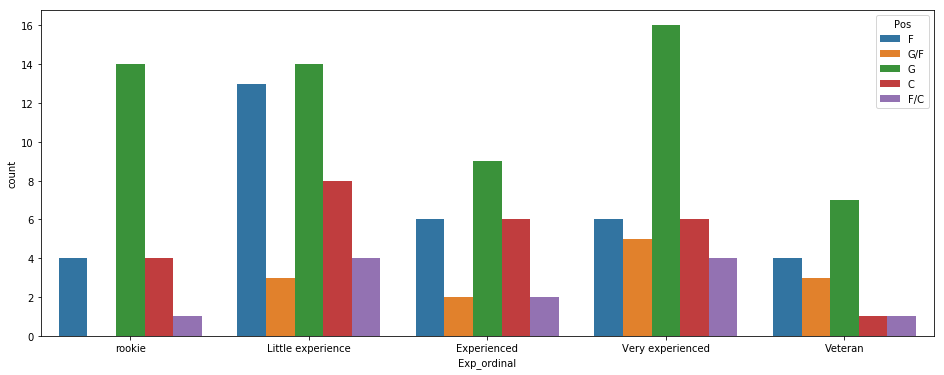

In [0]:
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba)

Comparing the **five distributions** is now easier, and we can make a couple of observations:

- There's only one **rookie** playing on a combined position **(F/C)**. This is significantly less compared to more experienced players, which suggests that combined positions (**F/C** and **G/F**) may require more complex skills on the field that rookies rarely have.
- Rookies are the only category where we don't find players on all positions. We can see there are no rookies who play on a G/F position.
- Guards predominate for every level of experience. This probably means that most players in a basketball team are guards. It's worth examining the distributions of a couple of teams to find whether this is true. If it's true, it might be interesting to find out why teams need so many guards.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Usng **sns.countplot()**, generate a grouped bar plot similar to the one above.

  - Place the **Exp_ordinal** variable on the x-axis.
  - Generate the bar plots for the **Pos** variable. The data set is stored in **wnba** variable.
  - Using the **order** parameter of **sns.countplot()**, order the values on the x-axis in **descending** order. The **order** parameter takes in a list of strings, so you should use **order = ['Veteran', 'Very experienced', ..........]**.
  - Using the **hue_order** parameter, order the bars of each bar plot in ascending alphabetic order. **hue_order** takes in a list of strings, so you can use **hue_order = ['C', 'F', ......].**

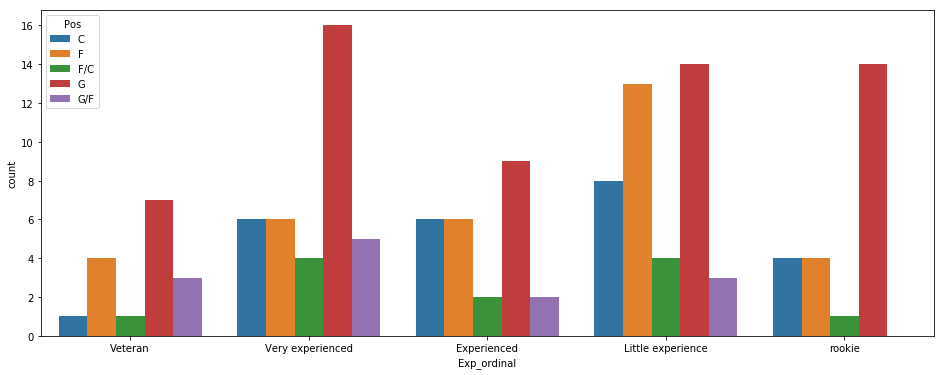

In [0]:
# put your code here
plt.figure(figsize=(16,6))
sns.countplot(x = "Exp_ordinal", hue = "Pos", data = wnba, order=["Veteran", "Very experienced", 
       "Experienced", "Little experience", "rookie"], hue_order=["C", "F", "F/C", "G", "G/F"])

## 2.3 Challenge: Do Older Players Play Less?


When players get past a certain age, they become less and less physically fit as they get older. Intuitively, the fitness level of a player should directly affect how much she plays in a season. On average, a WNBA player played approximately 497 minutes in the 2016-2017 season:


In [0]:
wnba['MIN'].mean()

496.97202797202794

Let's hypothesize that older players generally play less than this average of 497 minutes, while younger players generally play more. As a benchmark to distinguish between younger and older players, we'll take the mean age of players in our sample, which is approximately 27:

In [0]:
wnba['Age'].mean()

27.076923076923077

To test our hypothesis, we can generate a grouped bar plot to examine the frequency distribution of younger and older players that played under the average or as much as the average or above. Our hypothesis predicts that we should see a grouped bar plot that looks similar to this:

<img width="600" src="https://drive.google.com/uc?export=view&id=11S_m6RQAGChN_iOy7mS1qoEjCOWSEBDV">


To generate a graph like the one above, we'll first need to create two new variables:

- An ordinal variable which labels each player as "young" or "old". If the player is 27 or over, we'll label her "old", otherwise the label is "young".
- An ordinal variable which describes whether the minutes played is below or above average (or equal to the average). If a player played 497 minutes or more, we'll assign her the label "average or above", otherwise we'll assign "below average".

In the code below, we'll use **lambda** functions to describe quickly the labeling logic above and **Series.apply()** to apply the **lambda** functions on the **Age** and **MIN** columns. We'll name the two resulting columns **age_mean_relative** and **min_mean_relative**.


In [0]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                              'below average')
cols = ["Name","Age","age_mean_relative","MIN","min_mean_relative"]
wnba[cols].head()

,Name,Age,age_mean_relative,MIN,min_mean_relative
0,Aerial Powers,23,young,173,below average
1,Alana Beard,35,old,947,average or above
2,Alex Bentley,26,young,617,average or above
3,Alex Montgomery,28,old,721,average or above
4,Alexis Jones,23,young,137,below average


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Generate a grouped bar plot to confirm or reject our hypothesis. Using **sns.countplot()**:
  - Place the **age_mean_relative** variable on the x-axis. The **age_mean_relative** and **min_mean_relative** are already defined.
  - Generate the frequency distributions for the **min_mean_relative variable.**
- Analyze the graph and determine whether the data confirms or rejects our hypothesis. If it's a confirmation assign the string **'confirmation'** to a variable named **result**. If it's a rejection, assign the string **'rejection'** to the variable **result.**

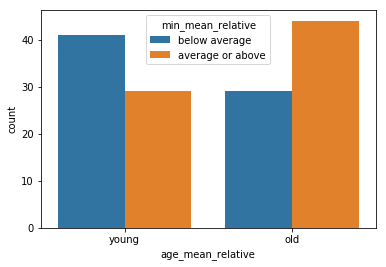

In [0]:
# put your code here
sns.countplot( x= "age_mean_relative", hue = "min_mean_relative", data = wnba)
result = "rejection"

## 2.4 Comparing Histograms

Contrary to what our hypothesis predicted, the grouped bar plot we built showed that among old players the "average or above" category is the most numerous. Among young players we saw an opposite pattern: there are more players who played below the average number of minutes.

A shortcoming of our analysis so far is that the **min_mean_relative** variable doesn't show much granularity. We can see that more **old players** belong to the **"average or above"** category than to **"below average"**, but we can't tell, for instance, whether **old players** generally play much more than the average. For all we know, they could have all played exactly 497 minutes (which is the average).

The **min_mean_relative** variable is ordinal, and it was derived from the **MIN** variable, which is measured on a ratio scale. The information provided by the **MIN** variable is much more granular, and we can plot the distribution of this variable instead. Because the **MIN** variable is measured on a ratio scale, we'll need to use histograms instead of bar plots.

The easiest way to **compare two histograms** is to superimpose one on top of the other. We can do that by using the pandas visualization methods we learned in the previous mission:

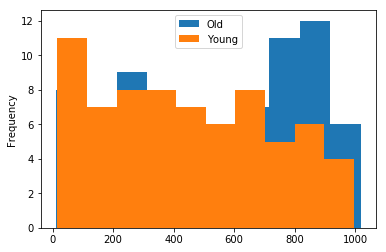

In [0]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

We can now see that most of the **old players** that belong to the **"average or above"** category play significantly more than average. The main downside of the visualization above is that the histogram for **young players** covers a large part of the other histogram. We can fix this easily by plotting only the shape of the histograms. We can do this using the **histtype** parameter and choose the **'step'** type:



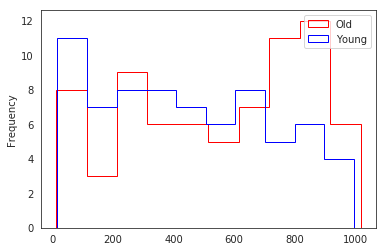

In [0]:
sns.set_style("white")
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True,color="red")
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True,color="blue")

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Looking on our graph above, it's not easy to visualize where the average number of minutes is. Using the [plt.axvline()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html) function, add a vertical line to demarcate the average point:
  - The vertical line should be at point 497 on the x-axis.
  - Use the label parameter of **plt.axvline()** to label it **'Average'**. Display the label by running **plt.legend()**.

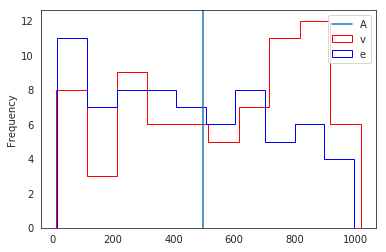

In [0]:
# put your code here
sns.set_style("white")
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True, color="red")
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True, color="blue")
plt.axvline(x = 497)
plt.legend("Average")

## 2.5 Kernel Density Estimate Plots


The step-type histograms we built made it possible to see clearly both distributions. The graph looked a bit overcrowded though, and the legend was not ideally positioned.

<img width="500" src="https://drive.google.com/uc?export=view&id=1Oogmu0kyhTgtK-N1zqsdzYGisTM2D6bE">

If we added more histograms to the graph above, it would become highly unreadable, and it'd be difficult to see any clear patterns. One solution to this problem is to smooth out the shape of the histograms to make them look less dense on the graph. This is how a single histogram would look smoothed out:


<img width="500" src="https://drive.google.com/uc?export=view&id=1us30ptyKArBL7GvemVRzYvBlGOD3KuMR">

We can smooth out our two histograms above for old and young players using the [Series.plot.kde()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.kde.html) function:


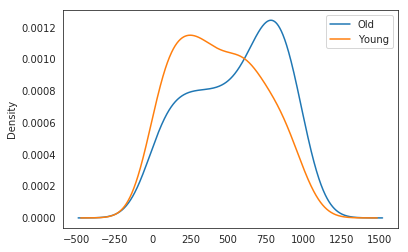

In [0]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)

Each of the smoothed histograms above is called a **kernel density estimate** plot or, shorter, **kernel density plot**. Unlike histograms, **kernel density** plots display densities on the y-axis instead of frequencies. The density values are actually probability values — which we'll be able to understand more about after the probability courses. All you need to know for now is that we can use kernel density plots to get a much clear picture about the shape of a distribution.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Reproduce the kernel density plots above, and add a vertical line to demarcate the average point.
  - The vertical line should be at point 497 on the x-axis.
  - Label the vertical line **'Average'** and make sure the label is displayed in the legend.
- Can we still see that most of the old players that belong to the **"average or above"** category play significantly more than average? If so, is the pattern more obvious (faster to observe) than in the case of the step-type histograms?

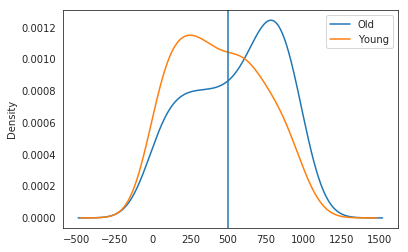

In [0]:
# put your code here
wnba[wnba["Age"] >= 27]["MIN"].plot.kde(label = "Old", legend=True)
wnba[wnba["Age"] < 27]["MIN"].plot.kde(label = "Young", legend=True)
plt.axvline(x = 497)
# plt.legend("Average")

## 2.6 Drawbacks of Kernel Density Plots

As data scientists, we'll often need to compare more than two distributions. In fact, previously in this mission we compared five distributions on a grouped bar plot:


<img width="400" src="https://drive.google.com/uc?export=view&id=1nSTEDf8EAAE8fQSqxs5dwrlqoU7PF9Gx">

Grouped bar plots are ideal for variables measured on nominal and ordinal scales. For variables measured on a ratio or interval scale, we learned that kernel density plots are a good solution when we have many distributions to compare. However, kernel density plots tend to become unreadable as we reach five distributions or more.

Let's say we're interested in analyzing the distribution of player height as a function of player position. In other words, we want to figure out, for instance, whether centers are generally taller than forwards, whether forwards are generally shorter than guards, and so on. In the code below, we'll segment the data set by player position, and for each segment we'll generate a kernel density plot for the distribution of the **Height** variable:

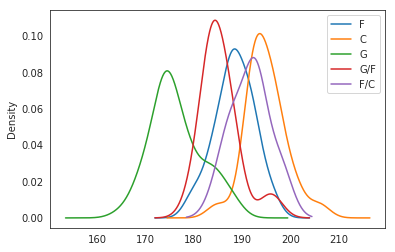

In [0]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

If we look very closely, we can see a couple of clear patterns: the shortest players are generally guards, the tallest players are generally centers, mid-height players are generally forwards or play in a combined position, etc.

Having to look very closely to a graph to identify obvious patterns is far from ideal. If there's any pattern, we want to see it immediately. To overcome this problem, we can use other kinds of graphs, which present the same information in a more readable way. For the rest of this mission, we'll explore two such alternatives.


## 2.7 Strip Plots

This is one alternative we can use to visualize the distribution of **heights** as a function of **player** position:


<img width="400" src="https://drive.google.com/uc?export=view&id=1aQYZGHJg1IDb0C5dUxaSE1coWb3ZI6Dp">


The **Pos** variable is represented on the x-axis, while **Height** is on the y-axis. Each of the five vertical lines made of distinctly colored bullets represents a distribution. These are the logical steps we'd take to build a plot like the one above:

- Segment the data set by player position.
- For every segment:
    - List all the values in the **Height** variable.
    - For every value in that list, draw a bullet point on a graph. The x-coordinate of the bullet point is given by the player position, and the y-coordinate by the player's height.
    
    
<img width="500" src="https://drive.google.com/uc?export=view&id=1Cp_Pd3uSY-9nE7mPw9oGz788ZPsrMUpJ">


Because we segment by player position, for every segment the player position values will be identical for every player while their heights will vary more or less. Because of the segmentation, the player position is also guaranteed to be different from segment to segment. After drawing all the bullet points for all the segments, we'll inevitably end up with five narrow vertical strips, one above each unique value on the x-axis. Because of this, each of the five plots is called a **strip plot**.

To generate the first graph above with five strip plots, we can use the [sns.stripplot()](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function from the seaborn module. We place the **Pos** variable on the x-axis and **Height** on the y-axis:





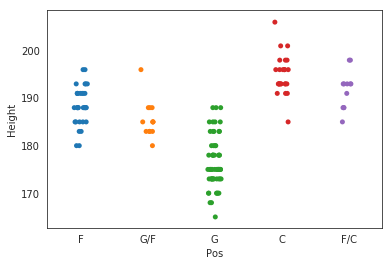

In [0]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba)

Patterns are now immediately visible. We can see on the graph that the **shortest players are guards** — in fact, all players under 180 cm are guards. The **tallest players are centers** — this is the only category with players above 2 meters. Among combined positions, we can see that **F/C has slightly taller representatives** — most likely because it requires center qualities (and we've seen that the tallest players are generally centers).

A **big downside** of strip plots is that the bullet **points overlap**. We can **fix** this by adding a bit of **jitter** to each distribution. We can do this by setting the jitter parameter to **True:**

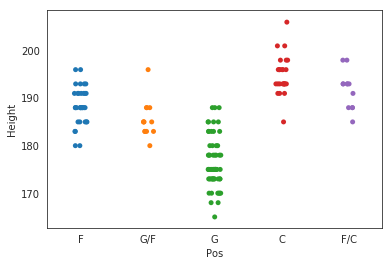

In [0]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = True)

On a side note, you might have noticed that strip plots are similar to the scatter plots we learned about in the visualization courses. **In fact, strip plots are actually scatter plots.** When one of the variables is nominal or ordinal, a scatter plot will generally take the form of a series of narrow strips (the number of narrow strips will be the same as the number of unique values in the nominal or ordinal variable).

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Using strip plots, examine the distribution of player **weight** (not height) as a function of player **position**. The graph should have the following properties:
  - The **Pos** variable in on the x-axis and the **Weight** variable on the y-axis.
  - Each **strip** plot has **jitter** added to it. The amount of jitter to apply is the one specific to **jitter = True.**
- Do you see any similarity with the distributions of the **Height** variable? If so, how could this be explained?

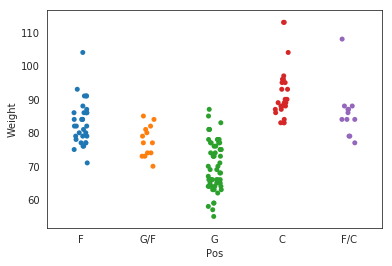

In [0]:
# put your code here
sns.stripplot(x = "Pos", y = "Weight", data = wnba, jitter = True)

## 2.8 Box plots

Besides strip plots, there's another kind of graph we can use to display many distributions at once and make sure everything is still readable. Below, we use this kind of graph to plot again the distribution of player height as a function of player position:


<img width="400" src="https://drive.google.com/uc?export=view&id=1YM9kJ-0f8eMvYEvI1C11TpvwQlqSuyRa">

Each individual plot above shows a distribution. Let's isolate the height distribution of guards and understand it by comparing it with a histogram showing the same distribution:

<img width="800" src="https://drive.google.com/uc?export=view&id=1ubAeLqYPthw2jJpN_ApMc30qM1BjSXpN">

In a nutshell, the graph on the right shows the range of the distribution and its three quartiles (the 25th, the 50th and the 75th percentile). This allows us to get a good visual intuition about the proportion of values that fall under a certain quartile, between any two quartiles, or between a quartile and the minimum or the maximum value in the distribution:


<img width="800" src="https://drive.google.com/uc?export=view&id=1Y0H3DLjHVbZOZSzOq8htlinzCxEAQW_R">


The two lines extending upwards and downwards out of the box in the middle look a bit like two whiskers, reason for which we call this plot a **box-and-whisker** plot, or, more convenient, just **box plot.**

We can generate the five box plots above using the [sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function. On the x-axis we want the **Pos** variable, and on the y-axis the **Height** variable.



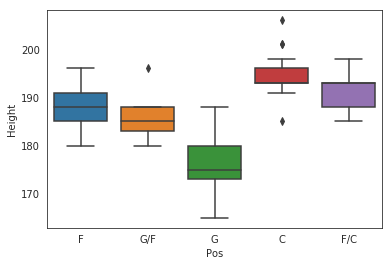

In [0]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

You might wonder what is the meaning of those few dots for the box plots of centers and guards/forwards (G/F), and **why some box plots seem to lack some of the quartiles**. We'll discuss this in the next screen. Now, let's practice generating box plots.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Using **sns.boxplot()**, generate a series of box plots to examine the distribution of player weight as a function of player position. Place the **Pos** variable on the x-axis and the **Weight** variable on the y-axis.

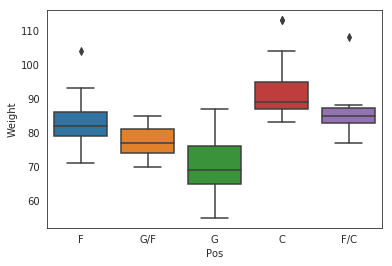

In [0]:
# put your code here
sns.boxplot(x = "Pos", y = "Weight", data = wnba)

## 2.9 Outliers

The few dots we see for the box plots of centers and guards/forwards (G/F) represent values in the distribution that are much larger or much lower than the rest of the values. A value that is much lower or much larger than the rest of the values in a distribution is called an **outlier.**

<img width="400" src="https://drive.google.com/uc?export=view&id=1WoZ6rZWu8bIFhJaPwQ5mDvoo2pU0dzLa">


A value is an **outlier** if:

- It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
- It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

<img width="600" src="https://drive.google.com/uc?export=view&id=1NminuWMq8htgOFD5TeAyiLFhXdCtHQjJ">

Probably this is not yet crystal clear, so let's walk through an example. Let's consider the box plot for centers:

<img width="800" src="https://drive.google.com/uc?export=view&id=1krahzq8cce3FQmzXVekQM0UumStTIq8l">


From the output of **wnba[wnba['Pos'] == 'C']['Height'].describe()**, we can see that the upper quartile (the 75th percentile) is 196 and the lower quartile (the 25th percentile) is 193. Hence, the interquartile range is 3.


$$
\text{interquartile range} = \text{upper quartile} - \text{lower quartil}
$$


Every value that is $3 \times 1.5$  bigger than the upper quartile is considered an outlier. $3 \times 1.5 = 4.5$, and the upper quartile is 196. This means that any value greater than $196 + 4.5 = 200.5$  is considered an outlier.

Similarly, every value that is  $3 \times 1.5$ lower that the lower quartile is an outlier. $3 \times 1.5 = 4.5$, and the upper quartile is 193. This means that any value less than $193 - 4.5 = 188.5$ is an outlier.


<img width="500" src="https://drive.google.com/uc?export=view&id=18HtBhxsTPDtuhq4W0YoXfCs8Rx1gz-yQ">


This formal definition of an outlier is arbitrary, and it could be changed if we wanted to. For any given distribution, the upper and lower quartiles, and the interquartile range remain constant. However, the 1.5 factor can vary. If the factor is increased, then the range outside which values are considered outliers increases as well. If the factor is decreased, the range outside which values are considered outlier decreases as well.

When we generate boxplots, we can increase or decrease this factor by using the **whis** parameter of the **sns.boxplot()** function. This is the same height distribution for centers without any outliers:




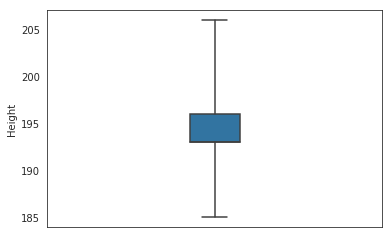

In [0]:
sns.boxplot(wnba[wnba['Pos'] == 'C']['Height'], whis = 4,
              orient = 'vertical', width = .15,)

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Consider the quartiles of the **Games Played** variable:

```python
>> wnba['Games Played'].describe()
count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64
```

- Find the interquartile range, and assign the result to a variable named **iqr**.
- Using a factor of 1.5, calculate the lower and upper bound outside which values are considered outliers.
    - Assign the value of the lower bound to a variable named **lower_bound**.
    - Assign the upper bound to a variable named **upper_bound.**
- Find how many values in the distribution are outliers.
    - Assign the number of outliers below the lower bound to a variable named **outliers_low.**
    - Assign the number of outliers below the upper bound to a variable named **outliers_high.**
- Plot a boxplot to check whether your answers are sensible.




iqr: 
7
lower_bound: 
17.5
upper_bound: 
33.5
outliers_low: 
23
outliers_high: 
0


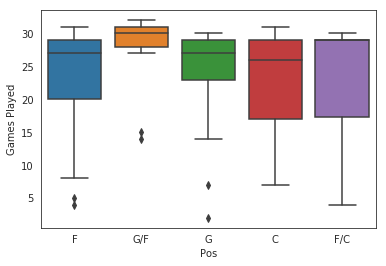

In [0]:
# put your code here
iqr = 29 - 22 #interquartile range = upper quartile(75th percentile) - lower quartile(25th percentile)
print("iqr: ")
print(iqr)
lower_bound = 22 - 4.5
print("lower_bound: ")
print(lower_bound)
upper_bound = 29 + 4.5
print("upper_bound: ")
print(upper_bound)
outliers_low = wnba[wnba["Games Played"] <= lower_bound]["Pos"].value_counts().sum()
print("outliers_low: ")
print(outliers_low)
outliers_high = wnba[wnba["Games Played"] >= upper_bound]["Pos"].value_counts().sum()
print("outliers_high: ")
print(outliers_high)
sns.boxplot(x = "Pos", y = "Games Played", data = wnba)

## 2.10 Next Steps

In this mission, we learned how to compare frequency distributions using graphs. Grouped bar plots are ideal to compare the frequency distributions of nominal or ordinal variables. For variables measured on an interval or ratio scale, we can use step-type histograms, kernel density plots, or, for better readability, strip plots or box plots.

<img width="400" src="https://drive.google.com/uc?export=view&id=1J7n1gvx8sQpJ-WNZF5do8VPQk_vf2ORb">


We've come a long way in this course from learning about sampling to visualizing multiple frequency distributions. We've made great progress so far and completed the workflow we set out to do in the first mission.


<img width="600" src="https://drive.google.com/uc?export=view&id=1XQ_nPiVB1pMBaS0ikBE6IPeifOYbDG11">
